# TP à rendre 1 quantification et échantillonage
Dans ce TP, nous aimerions transformer une image pseudo analogique en image numérique. 
L'image à coordonnées (x,y) réelles et valeurs d'amplitude f(x,y) réelles, devra être numérisée en:
- transformant d'abord les coordonnées en entiers 
- transformant ensuite les amplitudes en entiers

L'image pseudo analogique est contenue dans le fichier de données à loader.

# 1- Importantion des librairies necessaires au travail

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Lecture des fichiers d'amplitude et coordonnées

In [3]:
outfile1 = 'lines1.npy'
outfile2 = 'Cols1.npy'
outfile3 = 'amplitude1.npy'
lines=np.load(outfile1)
cols=np.load(outfile2)
amplitude=np.load(outfile3)

# Echantillonage

In [4]:
# utiliser un saut pour l'échantillonage
step=5
# réaliser l'échantillonage

#slicing  the lines and columns and taking only the fifth element (step=5)
newLines=lines[::step]
newCols=cols[::step]

# normalizing it from range 0-1  to  0-1000
newLines= newLines*1000
newCols= newCols*1000

#  turning the type into integers from floats 
newLines=newLines.astype(np.int64)
newCols= newCols.astype(np.int64)

# choosing the pixels from the picture 
newAmplitude = amplitude[newLines]
newAmplitude = newAmplitude[:,newCols]

# Quantification

In [5]:
nBits=8
# calculer le nombre de niveaux de gris
L= pow(2, nBits)
#réaliser la quantification

resultat=newAmplitude*(L-1)
resultat=np.around(resultat)
np.unique(resultat)

array([ 15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,  25.,
        26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,  36.,
        37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,
        48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,
        59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,
        70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,
        81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,
        92.,  93.,  94.,  95.,  96.,  97.,  98.,  99., 100., 101., 102.,
       103., 104., 105., 106., 107., 108., 109., 110., 111., 112., 113.,
       114., 115., 116., 117., 118., 119., 120., 121., 122., 123., 124.,
       125., 126., 127., 128., 129., 130., 131., 132., 133., 134., 135.,
       136., 137., 138., 139., 140., 141., 142., 143., 144., 145., 146.,
       147., 148., 149., 150., 151., 152., 153., 154., 155., 156., 157.,
       158., 159., 160., 161., 162., 163., 164., 16

# Notes:
the more nBits we have (from 0-8 since this is a grayscale image), the more fluid the image becomes, since that affects the image dynamic (interval of values a pixel can take)

# Afficher l'image résultante

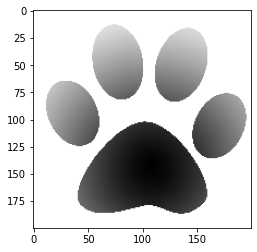

In [6]:
plt.imshow(resultat, cmap='gray')

# Sauvegarder l'image résultante

In [7]:
plt.imsave("résultat.png", resultat, cmap='gray')

# Lecture et affichage d'une autre image 


In [8]:
# lecture de l'image en niveau de gris
image = cv2.imread('toAdd.bmp', 0)

In [9]:
# afficher avec opencv
cv2.namedWindow('image', cv2.WINDOW_NORMAL)
cv2.imshow('image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Réaliser les operations sur l'image

Addition des deux images

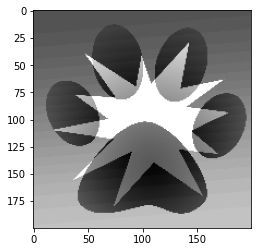

In [10]:
# additionner image et resultat
# si les deux images ne sont pas de même taille, 
# il faudra les redimensionner
# analyser les paramètres de redimensionnement
imageE = cv2.resize(image, resultat.shape)
imageAddition = imageE + resultat
plt.imshow(imageAddition, cmap='gray')

# Notes:
- there is an opencv method to blend two images together while controlling which image blends more into the result
- the formula goes as follows: $$newPixel = \alpha * pixel1 + \beta * pixel2 + \gamma$$

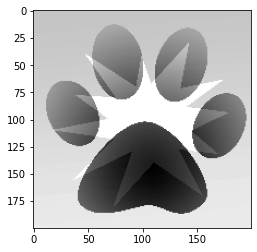

In [11]:
imageE = imageE.astype(np.int16)
resultat = resultat.astype(np.int16)
blendedImage = cv2.addWeighted(src1=imageE, alpha=0.2, src2=resultat, beta=0.8, gamma=0)
plt.imshow(blendedImage, cmap='gray')

Negatif de l'image

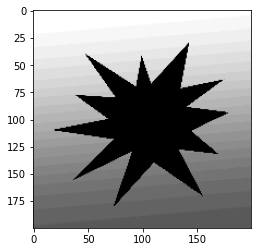

In [12]:
# soustraire de 255 de chaque pixel 
imageN = 255 - imageE
# afficher l'image résultante
plt.imshow(imageN, cmap='gray')

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi à 19h

# bonne chance
## for the report we added some markdown between the code along the way :D